In [2]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [3]:
from gensim import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE

import seaborn as sns
import plotly.express as px


from word_embedding.distance_wmd import *
import doc_embedding.moyenne as moyenne
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(font_scale=2)
sns.set_style("darkgrid")
meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"}

In [4]:
df_clustering = pd.read_csv("data/tuning/clustering/kmeans.csv",sep=";")
df_clustering["DocEmbedding"] = df_clustering["docEmbedding"] +" - " + df_clustering["docEmbedding2"]
df_clustering = df_clustering.sort_values("DocEmbedding")
df_clustering["Type Clustering"] = np.where(df_clustering["perplexity"].isna(),"Sans tSNE","Avec tSNE")
df_clustering = df_clustering[df_clustering["K"] >= 5]
df_clustering.head()

,K,initialisation,nb_iter,tolerance,val_obj,silhouette,Cal-Harabasz,DBCV,clustering,perplexity,wordEmbedding,docEmbedding,docEmbedding2,DocEmbedding,Type Clustering
745,8,random,10.0,0.0001,157534.750000,0.354327,7356.512265,-0.730945,kmeans,200.0,glove,Moyenne,TF,Moyenne - TF,Avec tSNE
746,5,k-means++,10.0,0.0001,253227.109375,0.347608,7114.149271,-0.767645,kmeans,200.0,glove,Moyenne,TF,Moyenne - TF,Avec tSNE
747,5,random,10.0,0.0001,253228.656250,0.347478,7114.132583,-0.779873,kmeans,200.0,glove,Moyenne,TF,Moyenne - TF,Avec tSNE
744,14,k-means++,10.0,0.0001,90798.976562,0.349676,7404.828131,-0.638580,kmeans,200.0,glove,Moyenne,TF,Moyenne - TF,Avec tSNE
1307,5,random,10.0,0.0001,447.631750,0.377940,12297.873431,-0.790767,kmeans,NaN,cbow,Moyenne,TF,Moyenne - TF,Sans tSNE


Text(0.5, 0.98, "Comparaison des métriques d'evaluation de Clustering")

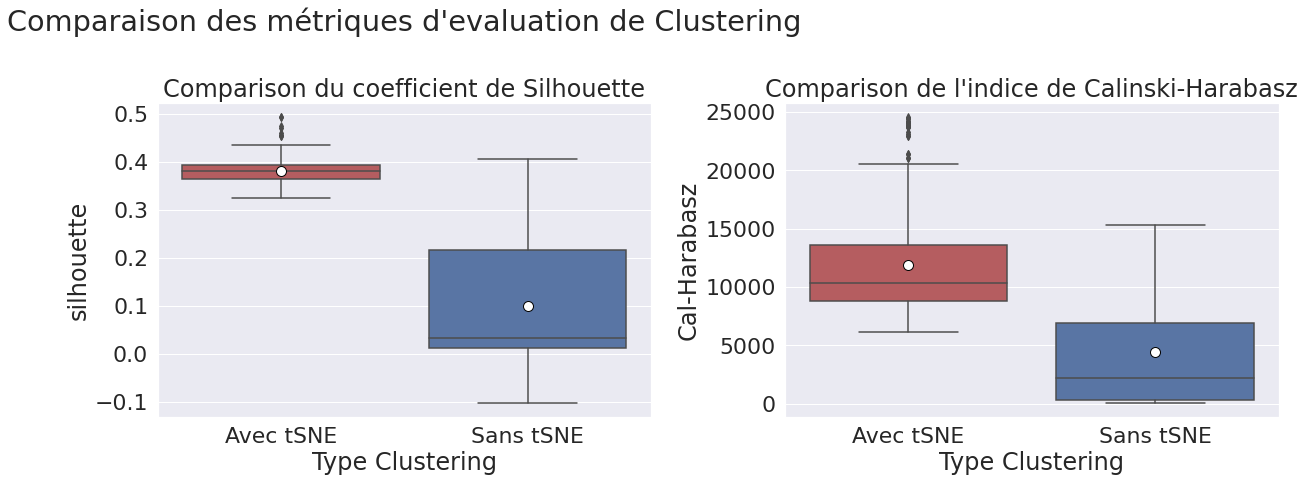

In [5]:
plt.figure(figsize = (25,7),tight_layout=True)
my_pal = {"Sans tSNE":"b","Avec tSNE":"r"}

sns.boxplot(data=df_clustering.iloc[np.where(np.logical_or(df_clustering["perplexity"].isna(),df_clustering["perplexity"]==200))],y="silhouette",x="Type Clustering",palette={"Sans tSNE":"b","Avec tSNE":"r"},
    showmeans=True,meanprops=meanprops,ax=plt.subplot(1,3,2,title="Comparison du coefficient de Silhouette"))
sns.boxplot(data=df_clustering.iloc[np.where(np.logical_or(df_clustering["perplexity"].isna(),df_clustering["perplexity"]==200))],y="Cal-Harabasz",x="Type Clustering",palette={"Sans tSNE":"b","Avec tSNE":"r"},
    showmeans=True,meanprops=meanprops,ax=plt.subplot(1,3,3,title="Comparison de l'indice de Calinski-Harabasz"))

plt.suptitle("Comparaison des métriques d'evaluation de Clustering")

In [7]:
df_clustering = df_clustering[df_clustering["perplexity"] == 200]

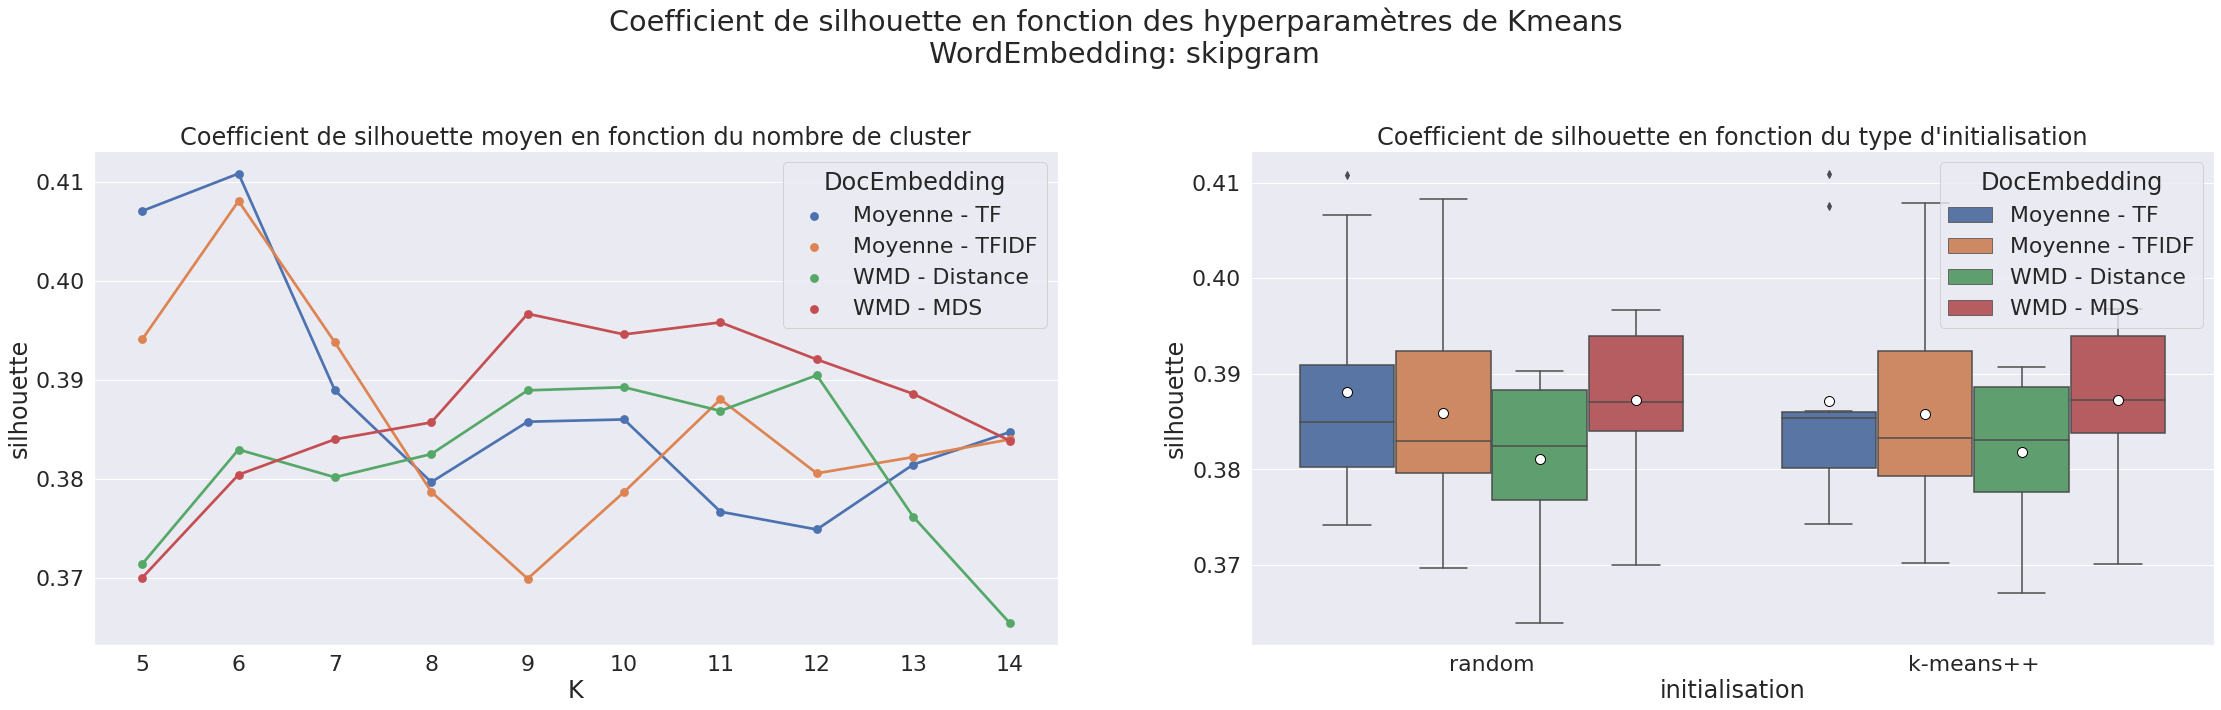

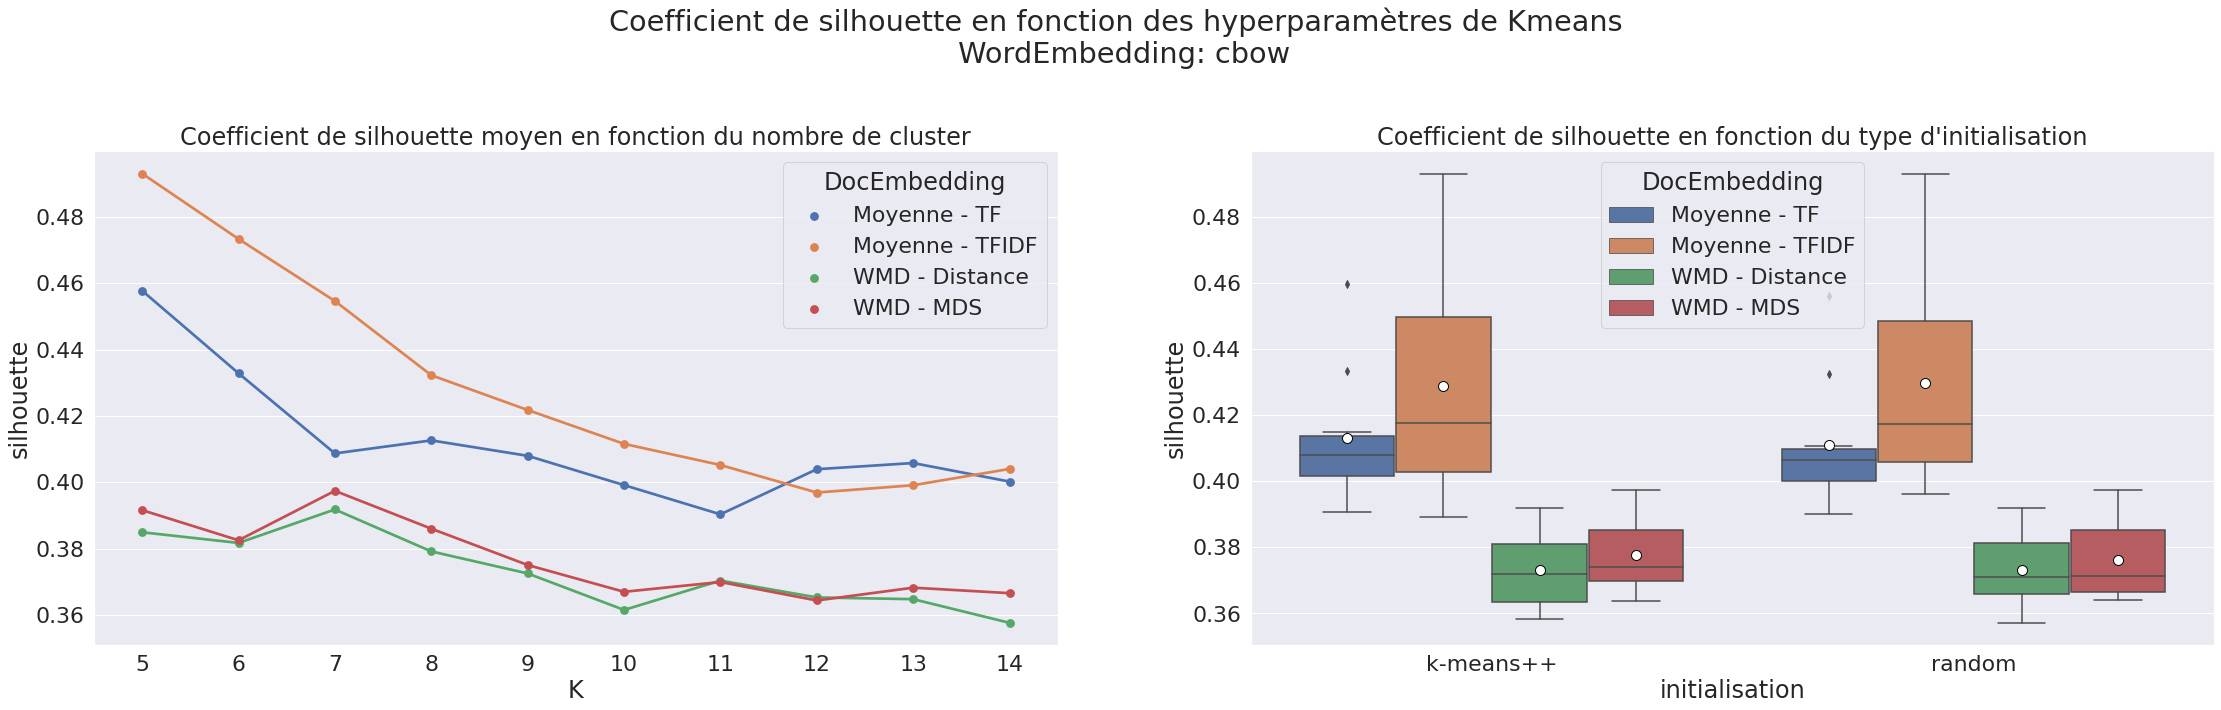

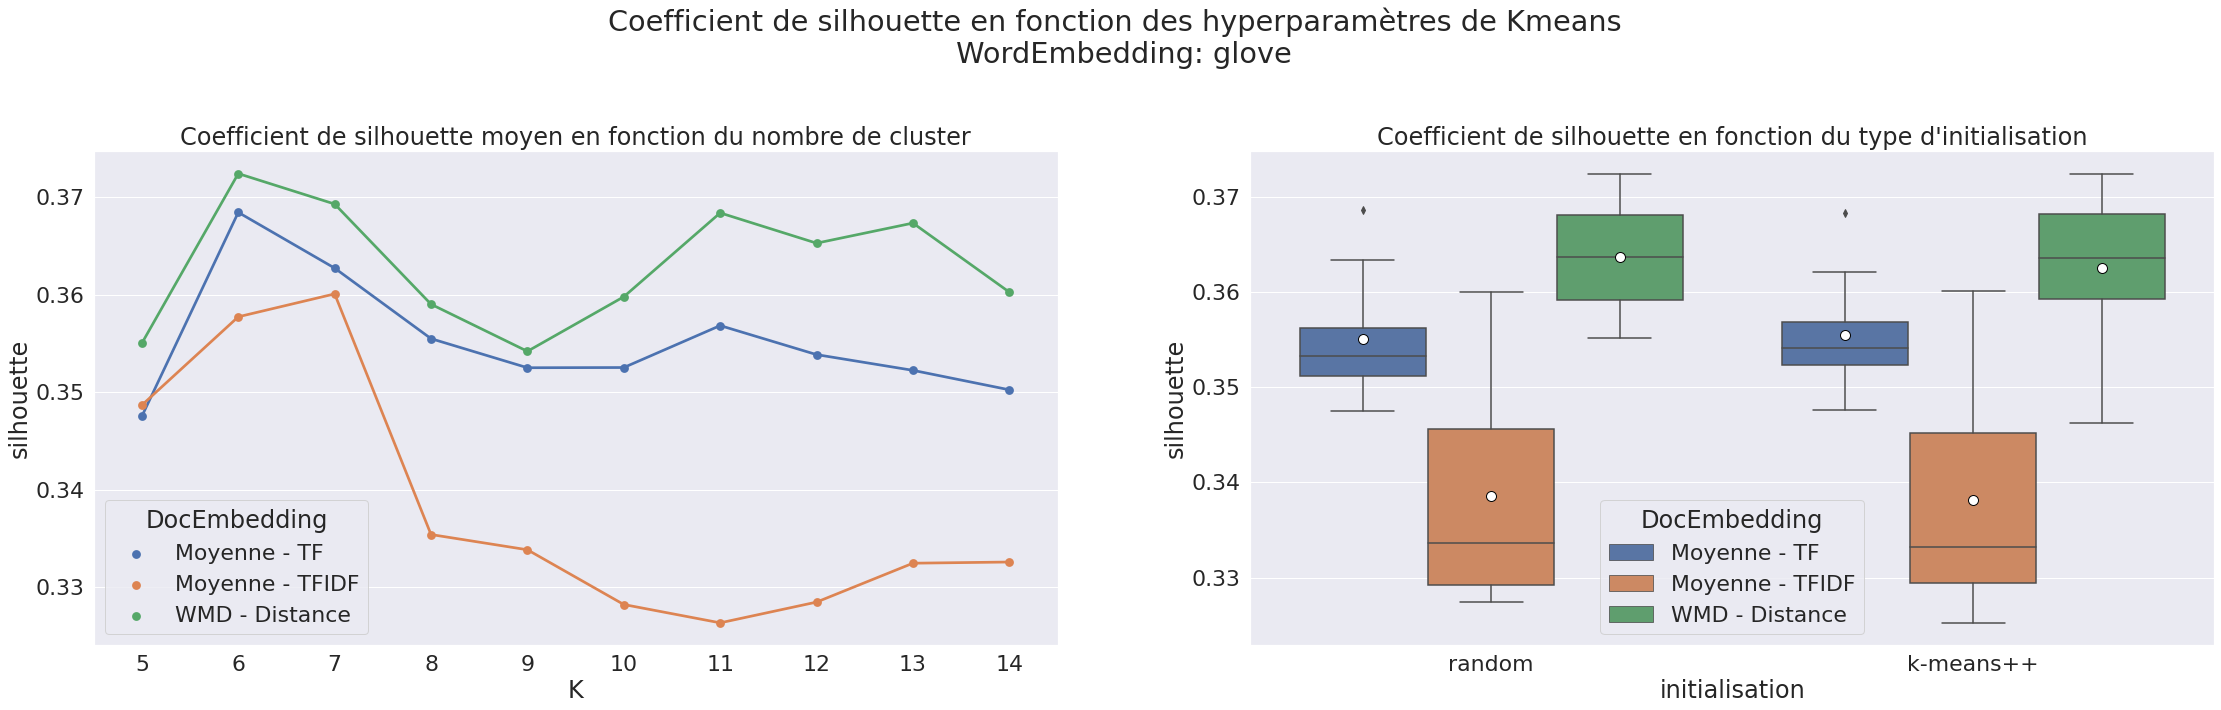

In [14]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (38,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="silhouette",x="K",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"Coefficient de silhouette moyen en fonction du nombre de cluster"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="silhouette",x="initialisation",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Coefficient de silhouette en fonction du type d'initialisation"))

    plt.suptitle(f"Coefficient de silhouette en fonction des hyperparamètres de Kmeans \n WordEmbedding: {modele}")
    plt.show()

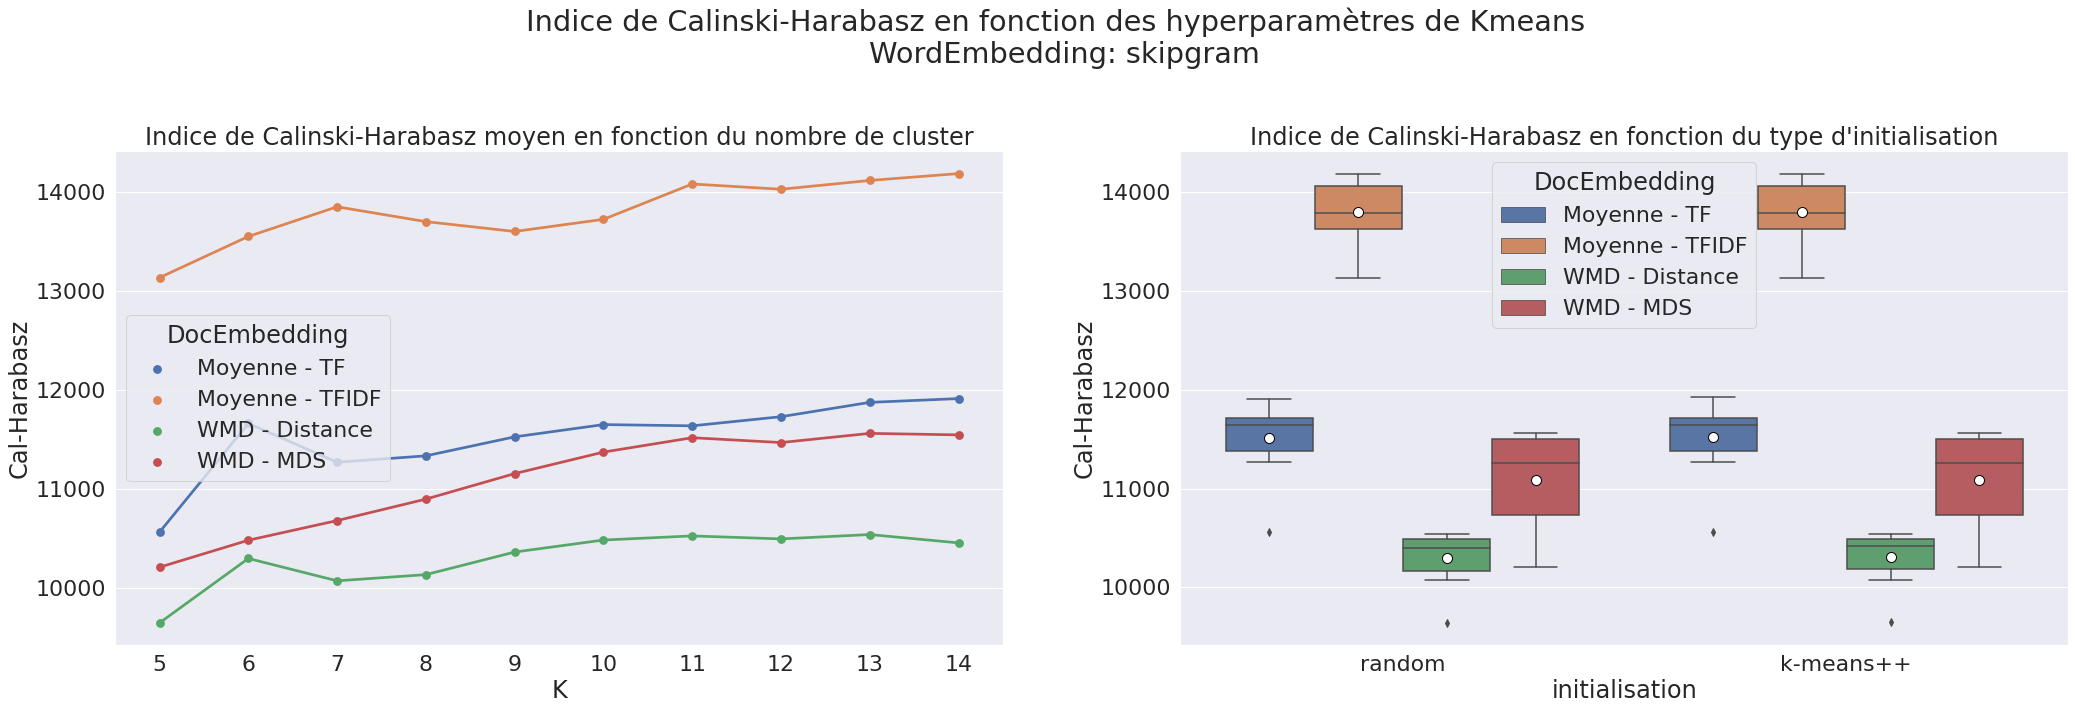

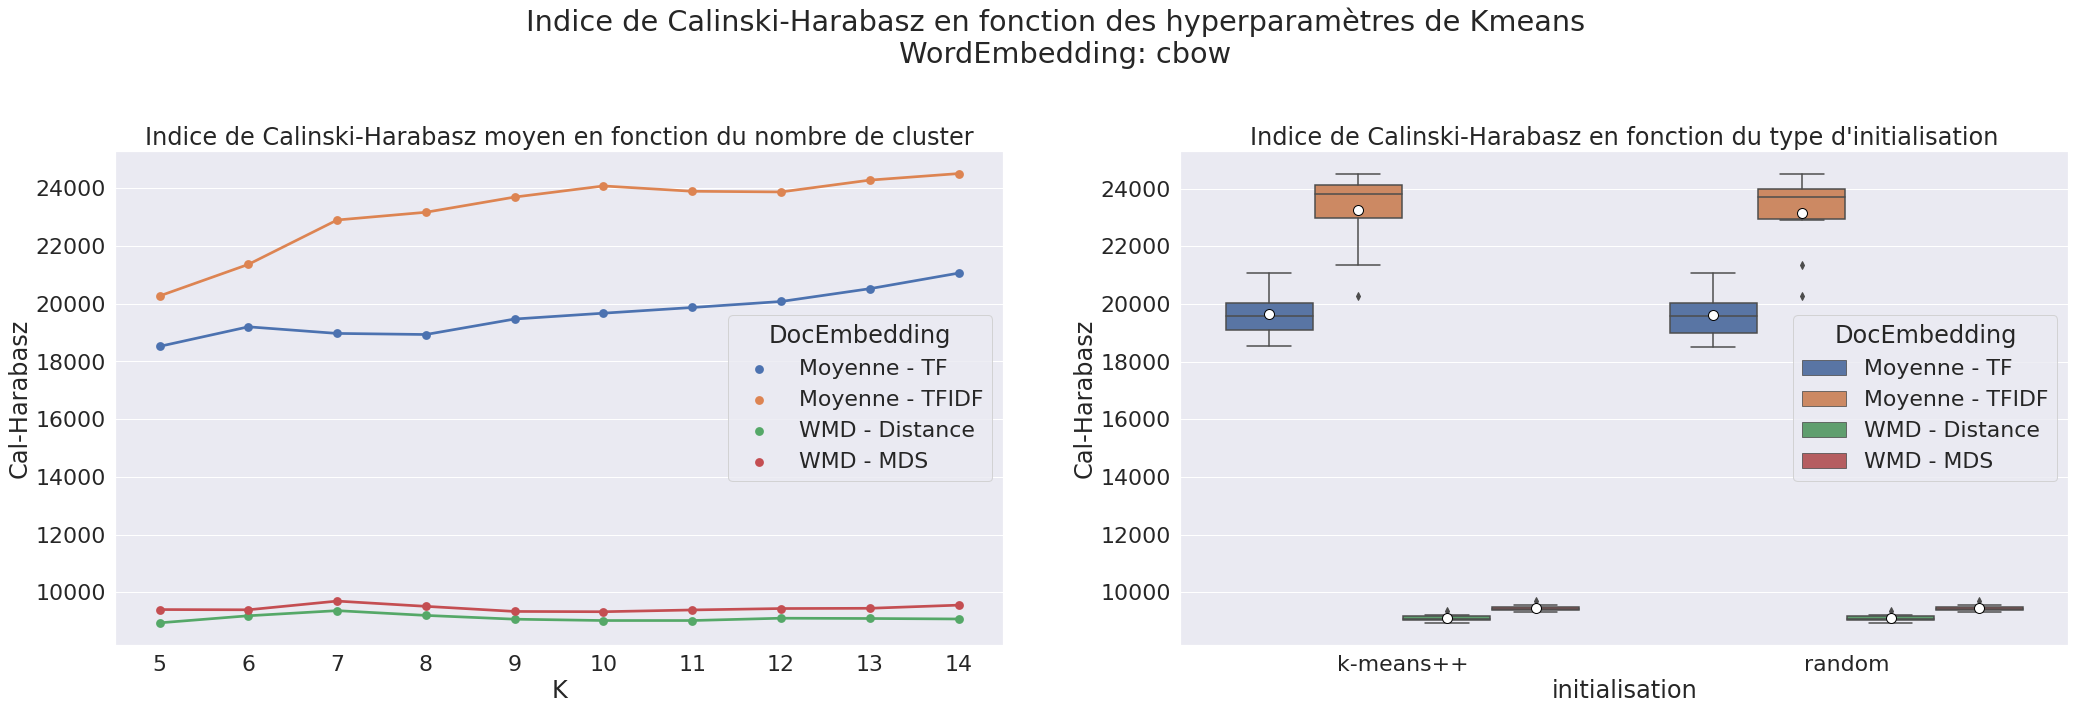

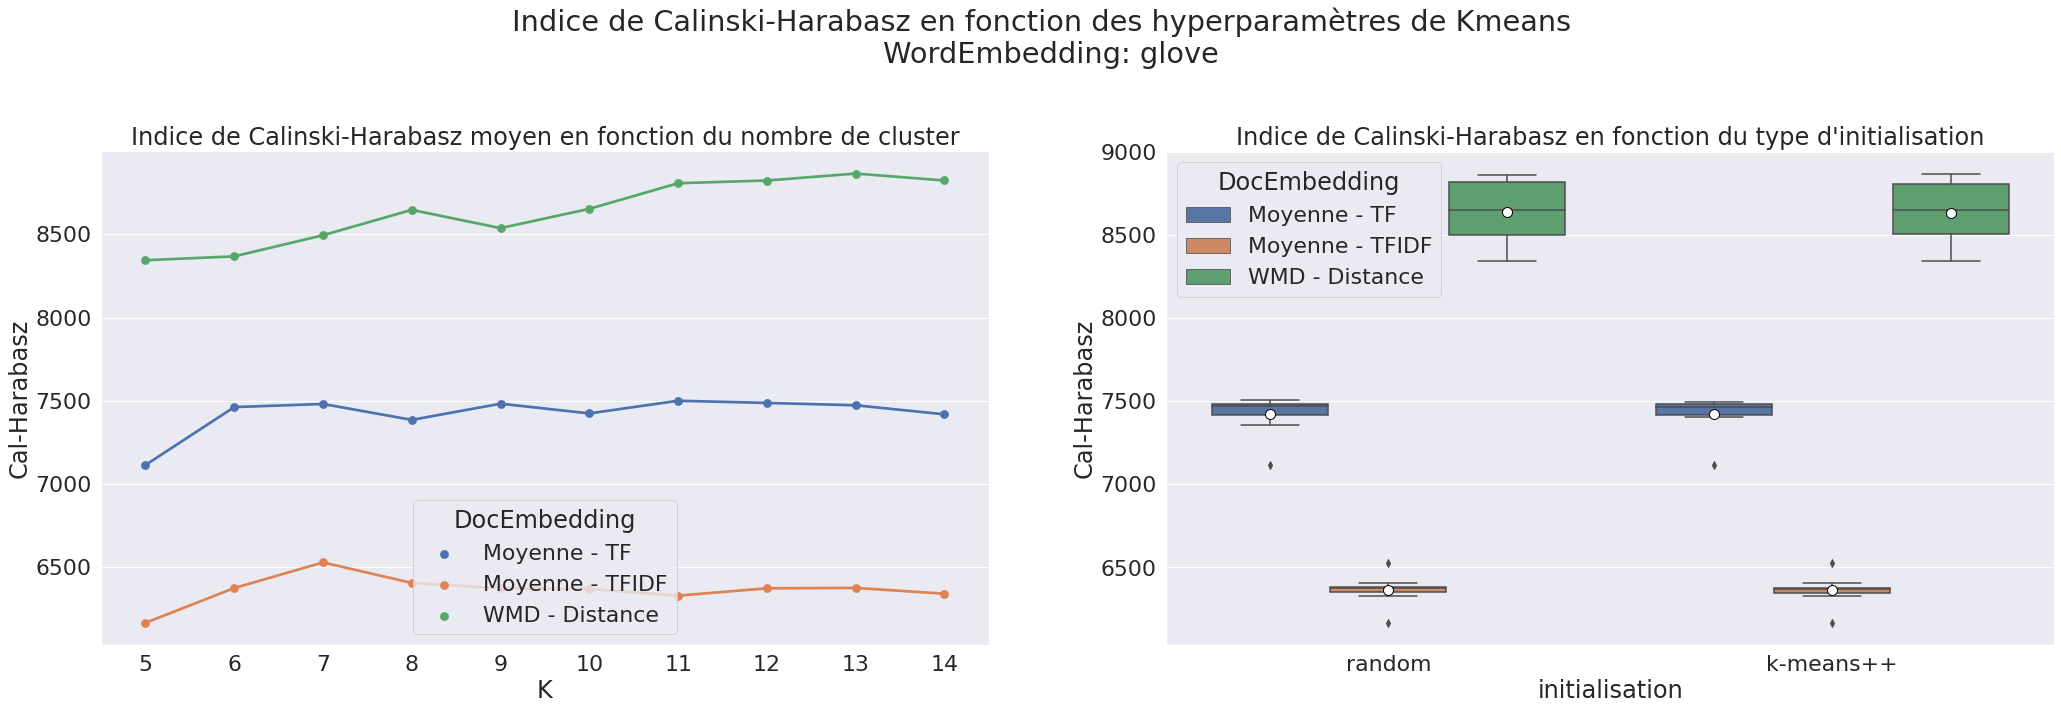

In [15]:
for modele in ["skipgram","cbow","glove"]:
    plt.figure(figsize = (35,20))

    sns.pointplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="Cal-Harabasz",x="K",hue="DocEmbedding",ci=None,
        ax=plt.subplot(2,2,1,title=f"Indice de Calinski-Harabasz moyen en fonction du nombre de cluster"))

    sns.boxplot(data=df_clustering[df_clustering["wordEmbedding"]==modele],y="Cal-Harabasz",x="initialisation",hue="DocEmbedding",showmeans=True,meanprops=meanprops,
        ax=plt.subplot(2,2,2,title=f"Indice de Calinski-Harabasz en fonction du type d'initialisation"))

    plt.suptitle(f"Indice de Calinski-Harabasz en fonction des hyperparamètres de Kmeans \n WordEmbedding: {modele}")
    plt.show()